IL FAUDRA BIEN FAIRE DEUX OU TROIS EXPERIMENTATIONS EN PLUS (AVEC COURBES LOSS/ACCURACY), GENRE COMPARER LES LOSS ET LES ARCHITECTURES ENTRE ELLES
ET BIEN PRESENTER LA PARTIE PCA, ET METTRE DES FORMULES MATHEMATIQUES OU IL FAUT, SINON LES EXPLICATIONS SERONT CLAIRES EN ELLES-MEMES

In [1]:
from preprocessing import *
from Activation import *
from Loss import *
from Module import *
from Network import *
from mltools import *

# CHARGEMENT DES DONNÉES ET PRE-PROCESSING

## RÉGRESSION

In [2]:
reg = pd.read_csv("datasets/insurance.csv").to_numpy()

print("Raw example")
print(reg[0])

# NORMALIZATION OF AGES
print("\n10 first ages before normalization")
print(reg[:10,0])
reg[:,0] = normalize(reg[:,0])
print("\n10 first ages after normalization")
print(reg[:10,0])

# ONE HOT SEXES
print("\n10 first sexes before onehot processing :")
print(reg[:10,1])
reg[:,1] = onehot(reg[:,1])
print("\n10 first sexes after onehot processing :")
print(reg[:10,1])

# CMI NORMALIZATION
print("\n10 first CMIs before normalization")
print(reg[:10,2])
reg[:,2] = normalize(reg[:,2])
print("\n10 first CMIs after normalization")
print(reg[:10,2])

# CHILDREN NUMBER NORM
print("\n10 first children numbers before normalization")
print(reg[:10,3])
reg[:,3] = normalize(reg[:,3])
print("\n10 first children numbers after normalization")
print(reg[:10,3])

# ONE HOT SMOKERS
print("\n10 first smoking habits before onehot processing :")
print(reg[:10,4])
reg[:,4] = onehot(reg[:,4])
print("\n10 first smoking habits after onehot processing :")
print(reg[:10,4])

# ENCODING REGION OF LIVING
print("\n10 first regions of living before encoding :")
print(reg[:10,5])
reg[:,5] = onehot(reg[:,5])
print("\n10 first regions of living after encoding :")
print(reg[:10,5])

# MEDICAL COSTS (VALUES TO PREDICT)
print("\n10 first medical costs before normalization :")
print(reg[:10,6])
reg[:,6] = normalize(reg[:,6])
print("\n10 first medical costs after normalization :")
print(reg[:10,6])

Raw example
[19 'female' 27.9 0 'yes' 'southwest' 16884.924]

10 first ages before normalization
[19 18 28 33 32 31 46 37 37 60]

10 first ages after normalization
[0.021739130434782608 0.0 0.21739130434782608 0.32608695652173914
 0.30434782608695654 0.2826086956521739 0.6086956521739131
 0.41304347826086957 0.41304347826086957 0.9130434782608695]

10 first sexes before onehot processing :
['female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'female']

10 first sexes after onehot processing :
[0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]

10 first CMIs before normalization
[27.9 33.77 33.0 22.705 28.88 25.74 33.44 27.74 29.83 25.84]

10 first CMIs after normalization
[0.3212267958030669 0.479149852031208 0.4584342211460855
 0.18146354587032545 0.3475921442023136 0.26311541565778845
 0.47027172450901256 0.3169222491256389 0.37315039009954254
 0.265805757331181]

10 first children numbers before normalization
[0 1 3 0 0 0 1 3 2 0]

10 first children numbers after normaliz

## CLASSIFICATION

### USPS

In [3]:
def load(filename):
    f=open(filename,'r')
    s = f.readline() # virer la premiere ligne
    X = np.array([[float(d) for d in lig.split()] for lig in f if len(lig)>10])
    Y = X[:,0] # premiere colonne
    X = X[:,1:]
    f.close()
    return X,Y

uspsX_train,uspsY_train = load('datasets/usps_train.txt')
uspsX_test,uspsY_test = load('datasets/usps_test.txt')

# TESTS ET EXPERIMENTATIONS

### Corrélation de Pearson

In [4]:
def pearson(X,Y):
    return np.corrcoef(X,Y)[0,1]

## REGRESSION LINEAIRE

### TESTS RÉGRESSION LINÉAIRE

In [5]:
y = reg[:,-1]
X = reg[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

In [6]:
nn = Linear(X_train.shape[1],y_train.shape[1])
loss = MSE()

epochs=300
epoch_list = list(range(epochs))
gradient_step=1e-4

In [7]:
lr = LinearRegression(nn, loss, epochs, gradient_step)
losses_train, scores_train, losses_valid, scores_valid = lr.fit(X_train,y_train,X_valid,y_valid)

100%|██████████| 300/300 [00:00<00:00, 1640.93it/s]


In [8]:
yhat_train = lr.predict(X_train)
print("Score R^2 en apprentissage :", lr.score(y_train, yhat_train))

Score R^2 en apprentissage : 0.7415308213959277


In [9]:
yhat = lr.predict(X_test)
print("Score R^2 en test :", lr.score(y_test, yhat))

Score R^2 en test : 0.7791128207285143


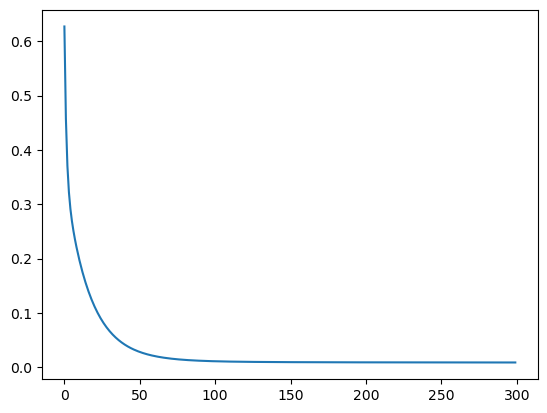

In [10]:
plt.plot(epoch_list, losses_train)
plt.show()

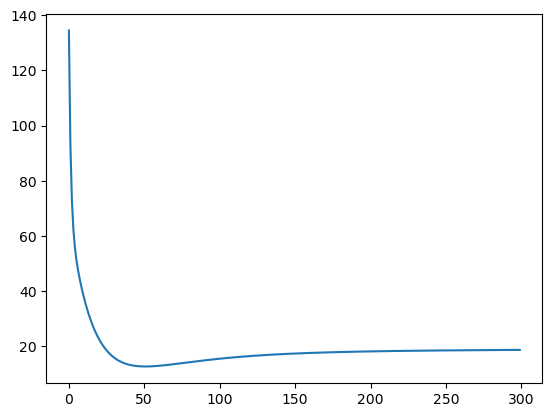

In [11]:
plt.plot(epoch_list, losses_valid)
plt.show()

In [12]:
print(pearson(losses_train, losses_valid))

0.9215066334133293


In [13]:
plt.plot(epoch_list, scores_train)
plt.plot(epoch_list, scores_valid)
plt.legend(["Train accuracy", "Valid accuracy"])
plt.show()


KeyboardInterrupt



In [ ]:
xmin= min(y_test.min(), yhat.min() )
xmax= max(y_test.max(), yhat.max() )

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.scatter(y_test, yhat, marker='x')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('y_test, verite terrain')
plt.ylabel('yhat, prediction du modele')
plt.legend()
ax.set_aspect('equal') # on veut une figure carrée et pas allongée.

plt.show()

### TESTS CLASSIFICATION BINAIRE

In [ ]:
# INITIALISATION DES DONNÉES, DU RÉSEAU DE NEURONES ET DE LA LOSS FUNCTION
X, y = gen_arti(nbex=5000, epsilon=0.3) # METTRE 10000 = MARCHE PAS (TROP DE DONNEES), MAIS MARCHE AVEC RESEAU DE NEURONES

y = np.where(y==-1,0,1).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# affichage des données
plot_data(X, y)

In [ ]:
if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

nn = Linear(X_train.shape[1],y_train.shape[1])
loss = MSE()

epochs=70
epoch_list = list(range(epochs))
gradient_step=1e-4

In [ ]:
lr = LinearRegression(nn, loss, epochs, gradient_step)
losses_train, scores_train, losses_valid, scores_valid = lr.fit(X_train,y_train,X_valid,y_valid)
yhat = lr.predict(X_test).reshape(y_test.shape)
yhat = np.where(yhat>=0.5, 1, 0)
print(lr.score(y_test, yhat))

In [ ]:
plt.plot(epoch_list, losses_train)
plt.show()

In [ ]:
plt.plot(epoch_list, losses_valid)
plt.show()

In [ ]:
print(pearson(losses_train, losses_valid))

In [ ]:
score = (np.where(y_test - yhat == 0, 1, 0).sum()) / y_test.size
print("Pourcentage de données bien classées :", score*100, "%")

In [ ]:
def predict(X):
    yhat = lr.predict(X)
    return np.where(yhat>=0.5, 1, 0)

plot_frontiere(X_test, predict, step=1000)
plot_data(X_test, y_test.reshape(-1))

## TESTS MODULE NON LINÉAIRE

### TWO LAYERS NETWORK IMPLEMENTATION

In [ ]:
X, y = gen_arti(nbex=10000, data_type=1)

y = np.where(y==-1,0,1).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

plot_data(X, y)

In [ ]:
if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(float)
X_valid = X_valid.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_valid = y_valid.astype(float)
y_test = y_test.astype(float)

layer1 = Linear(X_train.shape[1], 16)
layer2 = TanH()
layer3 = Linear(16, 1)
layer4 = Sigmoide()

loss = MSE()

net = Sequentiel([layer1, layer2, layer3, layer4], loss)

epochs = 120
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=1e-4)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for i in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, y_train, X_valid, y_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

yhat = net.predict(X_test)
yhat = np.where(yhat>=0.5, 1, 0)

score = (np.where(y_test - yhat == 0, 1, 0).sum()) / y_test.size
print(score)

In [ ]:
plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.legend(["train", "validation"])
plt.title("loss function (MSE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.plot(epoch_list, scores_train)
plt.plot(epoch_list, scores_valid)
plt.legend(["train", "validation"])
plt.title("scores")
plt.xlabel("epoch")
plt.ylabel("score")
plt.show()
print("Score atteint en training :", max(scores_train)*100)
print("Score atteint en validation :", max(scores_valid)*100)

In [ ]:
print(pearson(losses_train, losses_valid))

## TEST MULTI CLASSE

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test))
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

In [ ]:
plt.figure()
plt.imshow(X[0].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y[0])))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(float)
X_valid = X_valid.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_valid = y_valid.astype(float)
y_test = y_test.astype(float)

layer1 = Linear(X_train.shape[1], 128)
layer2 = TanH()
layer3 = Linear(128, 64)
layer4 = TanH()
layer5 = Linear(64, 10)
layer6 = Sigmoide()

loss = MSE()

net = Sequentiel([layer1, layer2, layer3, layer4, layer5, layer6], loss)

epochs = 40
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=1e-3)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for _ in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, y_train, X_valid, y_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

yhat = net.predict(X_test)
yhat = np.argmax(yhat,1)

y_test = np.argmax(y_test,1)

score = np.where(y_test == yhat, 1, 0).sum() / y_test.size
print(score)

In [ ]:
plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.legend(["train", "validation"])
plt.title("losses (MSE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.plot(epoch_list, scores_train)
plt.plot(epoch_list, scores_valid)
plt.legend(["train", "validation"])
plt.title("scores")
plt.xlabel("epoch")
plt.ylabel("score")
plt.show()
print("Score atteint en training :", max(scores_train)*100)
print("Score atteint en validation :", max(scores_valid)*100)

In [ ]:
print(pearson(losses_train, losses_valid))
print(pearson(scores_train, scores_valid))

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test))
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

layer1 = Linear(X_train.shape[1], 128)
layer2 = TanH()
layer3 = Linear(128, 64)
layer4 = TanH()
layer5 = Linear(64, 10)

loss = CElogSoftmax()

net = Sequentiel([layer1, layer2, layer3, layer4, layer5], loss)

epochs = 200
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=1e-4)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for i in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, y_train, X_valid, y_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

yhat = net.predict(X_test)
yhat = np.argmax(yhat,1)

y_test = np.argmax(y_test,1)

plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.legend(["train", "validation"])
plt.title("losses (CE + logSoftmax)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.plot(epoch_list, scores_train)
plt.plot(epoch_list, scores_valid)
plt.legend(["train", "validation"])
plt.title("scores")
plt.xlabel("epoch")
plt.ylabel("score")
plt.show()
print("Score (en %) atteint en training :", max(scores_train)*100)
print("Score (en %) atteint en validation :", max(scores_valid)*100)
score = np.where(y_test == yhat, 1, 0).sum() / y_test.size
print("Score (en %) atteint sur les données de test :", score*100)

In [ ]:
print(pearson(losses_train, losses_valid))

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)
X /= np.max(X)
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

In [ ]:
plt.figure()
plt.imshow(X[0].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y[0])))

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)
X /= np.max(X)
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

# TEST COMPRESSION

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_train = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

layer1 = Linear(X_train.shape[1], 64)
layer2 = TanH()
layer3 = Linear(64, 256)
layer4 = TanH()

layer1_dec = Linear(64,128)
layer1_dec._parameters = layer3._parameters.T
layer2_dec = TanH()
layer3_dec = Linear(128, X_train.shape[1])
layer3_dec._parameters = layer1._parameters.T
layer4_dec = Sigmoide()

loss = MSE()

net = Sequentiel([layer1, layer2, layer3, layer4_dec], loss)

epochs = 500
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=2e-4)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for _ in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, X_train, X_valid, X_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

Xtrain_hat = net.predict(X_train)
Xhat = net.predict(X_test)

plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.legend(["train", "validation"])
plt.title("losses (MSE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.figure()
plt.imshow(Xhat[3].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[3])))

In [ ]:
plt.figure()
plt.imshow(Xtrain_hat[0].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_train[0])))

In [ ]:
plt.figure()
plt.imshow(X_test[3].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[3])))

# COMPARAISON COMPRESSION ET PCA

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)
X = X / X.max()
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

pca = PCA(n_components=64)

X_pca_test = pca.fit_transform(X_test)

layer1 = Linear(X_train.shape[1], 64)
layer2 = TanH()

layer1_dec = Linear(64,X_train.shape[1])
layer2_dec = Sigmoide()

loss = MSE()

net = Sequentiel([layer1, layer2, layer1_dec, layer2_dec], loss)

epochs = 500
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=2e-4)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for _ in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, X_train, X_valid, X_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)
    
Xhat_comp = net.predict(X_test)

Xhat_pca = pca.inverse_transform(X_pca_test)
    
plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.show()

In [ ]:
plt.figure()
plt.imshow(X_test[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

In [ ]:
plt.figure()
plt.imshow(Xhat_comp[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

In [ ]:
plt.figure()
plt.imshow(Xhat_pca[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

### DECODEUR DIY VS DECODEUR PCA

100%|██████████| 100/100 [00:12<00:00,  8.24it/s]


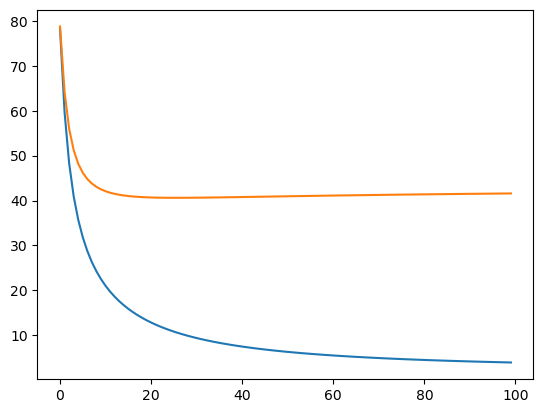

In [148]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)
X = X / X.max()
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

loss = MSE()

pca = PCA(n_components=64)

X_pca_train = pca.fit_transform(X_train)

X_pca_valid = pca.fit_transform(X_valid)

X_pca_test = pca.fit_transform(X_test)

decodeur = Sequentiel([TanH(), Linear(64, 256), Sigmoide()], loss)

epochs = 100
epoch_list = list(range(epochs))
opt_dec = Optim(decodeur, loss, eps=1e-3)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for _ in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt_dec.step(X_pca_train, X_train, X_pca_valid, X_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

Xpca_hat = decodeur.predict(X_pca_test)
Xpca_train = decodeur.predict(X_pca_train)
Xpca_hat2 = pca.inverse_transform(X_pca_test)

plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.show()

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 0")

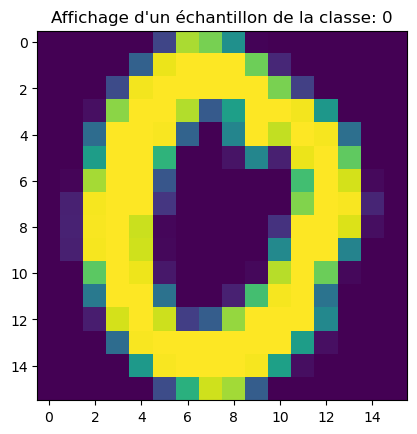

In [149]:
plt.figure()
plt.imshow(X_test[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 0")

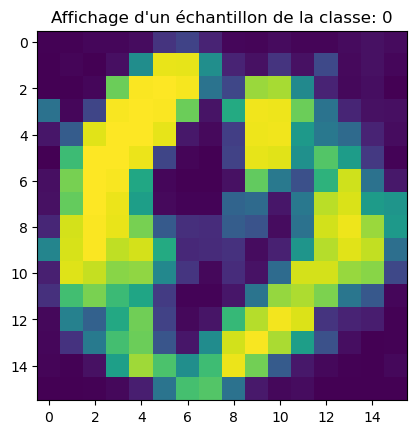

In [150]:
plt.figure()
plt.imshow(Xpca_hat[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 5")

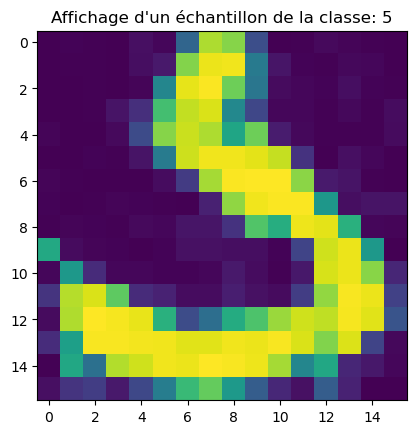

In [151]:
plt.figure()
plt.imshow(Xpca_train[12].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_train[12])))

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 0")

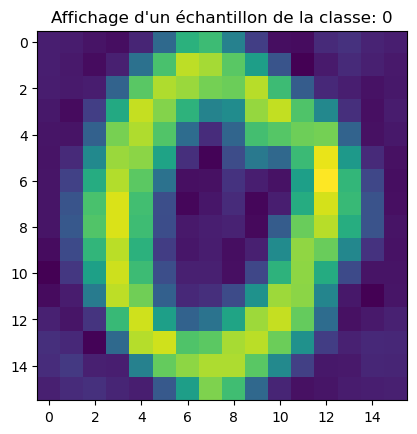

In [152]:
plt.figure()
plt.imshow(Xpca_hat2[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

### PCA DECODEUR

100%|██████████| 100/100 [00:03<00:00, 25.41it/s]


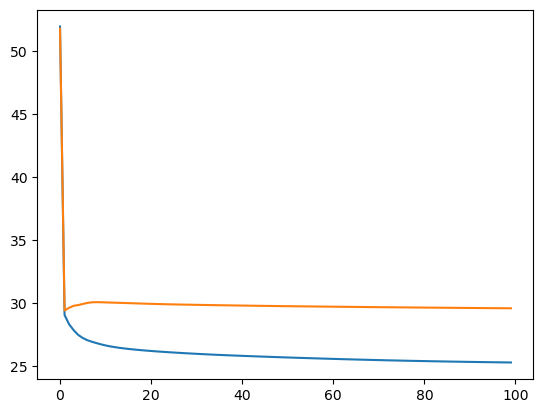

In [259]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)
X = X / X.max()
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

loss = MSE()

pca_train = PCA(n_components=64)
pca_valid = PCA(n_components=64)
pca_test = PCA(n_components=64)

X_pca_train = pca_train.fit_transform(X_train)
X_pca_valid = pca_valid.fit_transform(X_valid)
pca_test.fit(X_test)

encodeur = Sequentiel([Linear(X_train.shape[1], 64), Sigmoide()], loss)

epochs = 100
epoch_list = list(range(epochs))
opt_enc = Optim(encodeur, loss, eps=1e-3)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for _ in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt_enc.step(X_train, X_pca_train, X_valid, X_pca_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

tmp = encodeur.predict(X_test)

Xpca_hat = pca_test.inverse_transform(tmp)

plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.show()

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 0")

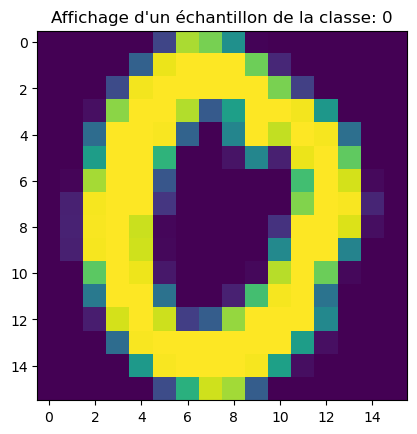

In [260]:
plt.figure()
plt.imshow(X_test[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

Text(0.5, 1.0, "Affichage d'un échantillon de la classe: 0")

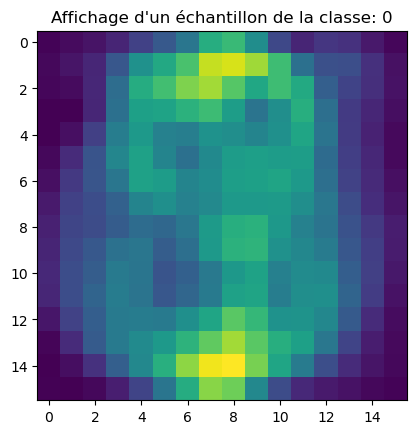

In [261]:
plt.figure()
plt.imshow(Xpca_hat[6].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(np.argmax(y_test[6])))

# CONVOLUTION 1D

In [ ]:
X = np.concatenate((uspsX_train, uspsX_test)).astype(np.float64)[:500] # ATTENTION ON ENTRAINE SUR 500 DONNEES ET PAS TOUT LE DATASET
y = np.concatenate((uspsY_train, uspsY_test)).astype(int)[:500]

onehot = np.zeros((y.size,10))
onehot[np.arange(y.size),y]=1

y = onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if len(y_train.shape)==1:
    y_train = y_train.reshape(-1,1)
    y_valid = y_valid.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_valid = y_valid.astype(np.float64)
y_test = y_test.astype(np.float64)

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

layer1 = Conv1D(128, 1, 32)
layer2 = MaxPool1D(2,2)
layer3 = Flatten()
layer4 = Linear(2048,100)
layer5 = ReLU()
layer6 = Linear(100,10)

loss = CElogSoftmax()

net = Sequentiel([layer1, layer2, layer3, layer4, layer5, layer6], loss)

epochs = 100
epoch_list = list(range(epochs))
opt = Optim(net, loss, eps=1e-5)

losses_train = []
losses_valid = []
scores_train = []
scores_valid = []
for i in tqdm(range(epochs)):
    loss_train, loss_valid, score_train, score_valid = opt.step(X_train, y_train, X_valid, y_valid)
    losses_train.append(loss_train)
    losses_valid.append(loss_valid)
    scores_train.append(score_train)
    scores_valid.append(score_valid)

yhat = net.predict(X_test)
yhat = np.argmax(yhat,1)

y_test = np.argmax(y_test,1)

plt.plot(epoch_list, losses_train)
plt.plot(epoch_list, losses_valid)
plt.legend(["train", "validation"])
plt.title("losses (CE + logSoftmax)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.plot(epoch_list, scores_train)
plt.plot(epoch_list, scores_valid)
plt.legend(["train", "validation"])
plt.title("scores")
plt.xlabel("epoch")
plt.ylabel("score")
plt.show()
print("Score (en %) atteint en training :", max(scores_train)*100)
print("Score (en %) atteint en validation :", max(scores_valid)*100)
score = np.where(y_test == yhat, 1, 0).sum() / y_test.size
print("Score (en %) atteint sur les données de test :", score*100)